# To Build A Better Benchmark (Project in Progress)
An analysis into the nature of the Crossfit Games and its Athletes

By: Evan Ticknor

Data Provided by Crossfit and Sam Swift

## Goals for study

- Data Clensing
- See recorded attributes of athletes competing
- Visualize WOD benchmarks
- Visualize Raw Power data
- Compare baseline lifts to competitive performance
- Compare WOD benchmark performance to competitive performance
- Create predictive model to determine final rank based on features
    - Train/Test Set
    - Feature Selection
    - Feature Scaling
    - Performance Metrics
- Conclusions

In [1]:
import pandas as pd


athletes = pd.read_csv(r'C:\Users\Evan\Documents\Crossfit Data\bgadoci-crossfit-data\bgadoci-crossfit-data\athletes.csv')
leaderboard = pd.read_csv(r'C:\Users\Evan\Documents\Crossfit Data\bgadoci-crossfit-data\bgadoci-crossfit-data\leaderboard.15.csv')

C:\Users\Evan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Basic Descriptions

### Athlete Profile Info
Information from the sign-up forms to the Crossfit Games. It was not required of athletes to fill out all portions of the form, thus the lack of data in most columns.

In [2]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423006 entries, 0 to 423005
Data columns (total 28 columns):
athlete_id            423003 non-null float64
name                  331110 non-null object
region                251262 non-null object
team                  155160 non-null object
affiliate             241916 non-null object
gender                331110 non-null object
age                   331110 non-null float64
height                159869 non-null float64
weight                229890 non-null float64
fran                  55426 non-null float64
helen                 30279 non-null float64
grace                 40745 non-null float64
filthy50              19359 non-null float64
fgonebad              29738 non-null float64
run400                22246 non-null float64
run5k                 36097 non-null float64
candj                 104435 non-null float64
snatch                97280 non-null float64
deadlift              115323 non-null float64
backsq                110517

In [3]:
athletes.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,423003.000000,331110.000000,1.598690e+05,229890.000000,5.542600e+04,3.027900e+04,4.074500e+04,1.935900e+04,2.973800e+04,2.224600e+04,3.609700e+04,1.044350e+05,9.728000e+04,1.153230e+05,1.105170e+05,5.060800e+04
mean,292748.166538,32.516750,1.206217e+02,170.896137,9.886691e+02,1.207950e+03,5.766025e+02,2.127863e+03,1.472252e+03,5.241279e+02,3.411464e+03,2.709107e+02,2.424957e+02,6.970503e+02,5.852109e+02,4.269613e+04
std,184969.660327,7.730671,2.097995e+04,58.379799,7.200430e+04,6.824091e+04,4.891145e+04,6.055021e+04,9.762688e+04,5.628804e+04,1.251980e+05,2.596882e+04,2.708942e+04,5.523235e+04,5.052976e+04,9.546078e+06
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,-7.000000e+00,-6.000000e+00
25%,135091.500000,27.000000,6.600000e+01,145.000000,2.150000e+02,5.250000e+02,1.490000e+02,1.308000e+03,2.400000e+02,6.200000e+01,1.242000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01
50%,275839.000000,31.000000,6.900000e+01,170.000000,2.900000e+02,5.950000e+02,1.930000e+02,1.550000e+03,2.940000e+02,7.100000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01
75%,473188.000000,37.000000,7.200000e+01,192.000000,3.920000e+02,6.940000e+02,2.620000e+02,1.809000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,3.900000e+01
max,633083.000000,125.000000,8.388607e+06,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09


### Leaderboard Info
Leaderboard information is posted as results by athlete and event.

In [4]:
leaderboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572222 entries, 0 to 1572221
Data columns (total 8 columns):
year                  1572222 non-null int64
division              1572222 non-null int64
stage                 1572222 non-null float64
athlete_id            1572222 non-null float64
rank                  1165028 non-null float64
score                 1247633 non-null float64
retrieved_datetime    1572222 non-null object
scaled                1572222 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 96.0+ MB


In [5]:
leaderboard.describe()

,year,division,stage,athlete_id,rank,score,scaled
count,1572222.0,1.572222e+06,1.572222e+06,1.572222e+06,1.165028e+06,1.247633e+06,1.572222e+06
mean,15.0,1.415071e+00,2.683333e+00,3.730700e+05,5.116429e+04,2.623865e+02,2.679742e-01
std,0.0,4.927345e-01,1.472432e+00,1.869765e+05,3.269442e+04,2.828226e+02,4.429042e-01
min,15.0,1.000000e+00,1.000000e+00,8.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00
25%,15.0,1.000000e+00,1.100000e+00,2.294782e+05,2.405750e+04,8.400000e+01,0.000000e+00
50%,15.0,1.000000e+00,2.500000e+00,4.110030e+05,4.801400e+04,1.420000e+02,0.000000e+00
75%,15.0,2.000000e+00,4.000000e+00,5.395190e+05,7.424400e+04,3.160000e+02,1.000000e+00
max,15.0,2.000000e+00,5.000000e+00,6.346940e+05,1.365320e+05,3.599000e+03,1.000000e+00


## Organizing for the Multi-stage Analysis
Based off the Max and Min data points from initial peek into our athletes profiles, it obvious there is some signifigant cleaning to be done. My basis for finding ranges is fairly simple.

- Any Lift should be, at minimum, the weight of a barbell
- Any runing event or Workout should be within reasonable limits, no WR in the 400m is going to occur by an athlete in the games

From this cleaning it is obvious our feature selection is going to have to straddle usefullness with sample size. Athletes who completely filled out these forms are a much smaller portion of the overall population.

####  Fundamental Lifts

In [6]:
lifts = athletes[['athlete_id', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups']].copy()
#Where the values are in pounds
lifts = lifts[lifts['candj'].between(45, 700)]
lifts = lifts[lifts['snatch'].between(45, 700)]
lifts = lifts[lifts['deadlift'].between(45, 700)]
lifts = lifts[lifts['backsq'].between(45, 700)]
lifts = lifts[lifts['pullups'].between(1, 100)]
lifts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38445 entries, 3 to 422918
Data columns (total 6 columns):
athlete_id    38445 non-null float64
candj         38445 non-null float64
snatch        38445 non-null float64
deadlift      38445 non-null float64
backsq        38445 non-null float64
pullups       38445 non-null float64
dtypes: float64(6)
memory usage: 2.1 MB


#### Benchmark WODs

In [7]:
wods = athletes[['athlete_id', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad']].copy()
#Benchmark WODs
wods = wods[wods['fran'].between(45, 500)]
wods = wods[wods['helen'].between(200, 2000)]
wods = wods[wods['grace'].between(100, 500)]
wods = wods[wods['filthy50'].between(700, 3000)]
wods = wods[wods['fgonebad'].between(100, 500)]
wods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 12 to 422152
Data columns (total 6 columns):
athlete_id    5912 non-null float64
fran          5912 non-null float64
helen         5912 non-null float64
grace         5912 non-null float64
filthy50      5912 non-null float64
fgonebad      5912 non-null float64
dtypes: float64(6)
memory usage: 323.3 KB


#### Basic Attributes

In [8]:
atts = athletes[['athlete_id', 'age', 'height', 'weight']].copy()
#Measureables in inches, pounds, and years
atts = atts[atts['height'].between(48, 85)]
atts = atts[atts['weight'].between(80, 350)]
atts = atts[atts['age'].between(13, 85)]
atts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142491 entries, 0 to 422997
Data columns (total 4 columns):
athlete_id    142491 non-null float64
age           142491 non-null float64
height        142491 non-null float64
weight        142491 non-null float64
dtypes: float64(4)
memory usage: 5.4 MB


#### Running States

In [9]:
run = athletes[['athlete_id', 'run400', 'run5k', 'gender']].copy()
run = run[run['run400'].between(44, 80)]
run = run[run['run5k'].between(840, 2100)]
run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 12 to 422598
Data columns (total 4 columns):
athlete_id    9722 non-null float64
run400        9722 non-null float64
run5k         9722 non-null float64
gender        9722 non-null object
dtypes: float64(3), object(1)
memory usage: 379.8+ KB


#### Regions

In [10]:
athletes.region.unique()

array(['South West', nan, 'Southern California', 'South Central',
       'Central East', 'Europe', 'North East', 'Africa', 'South East',
       'Australia', 'Northern California', 'Latin America', 'Canada East',
       'North Central', 'North West', 'Mid Atlantic', 'Canada West',
       'Asia'], dtype=object)

## Working with the Relational Databases

### Splitting data based on Gender
Weights and scores will differ too greatly to keep them as single entity. Gender will be a filter for our analysis and the regression will be repeated for each data set in the final product delivered.

In [11]:
male_lead = leaderboard.loc[leaderboard['division'] == 1]
fem_lead  = leaderboard.loc[leaderboard['division'] == 2]

#### Merging Leaderboard and Athlete Profiles
Splitting the data by male and female as well

In [12]:
places   = leaderboard.pivot_table('rank', index = 'athlete_id', columns = 'stage')
places_m = male_lead.pivot_table('rank', index = 'athlete_id', columns = 'stage')
places_f = fem_lead.pivot_table('rank', index = 'athlete_id', columns = 'stage')

lifts_m = lifts.merge(places_m, on='athlete_id')
lifts_f = lifts.merge(places_f, on='athlete_id')
wods_m  = wods.merge(places_m, on='athlete_id')
wods_f  = wods.merge(places_f, on='athlete_id')
atts_m  = atts.merge(places_m, on='athlete_id')
atts_f  = atts.merge(places_f, on='athlete_id')

Adding an average rank column to the dataframes after scaling

In [13]:
places.columns = places.columns.map(str)
places.columns.tolist()
places['ave_rank'] = places[['1.0', '1.1', '2.0', '3.0', '4.0', '5.0']].mean(axis=1)

## Visualizing our Data

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### General Attributes of Athletes

C:\Users\Evan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


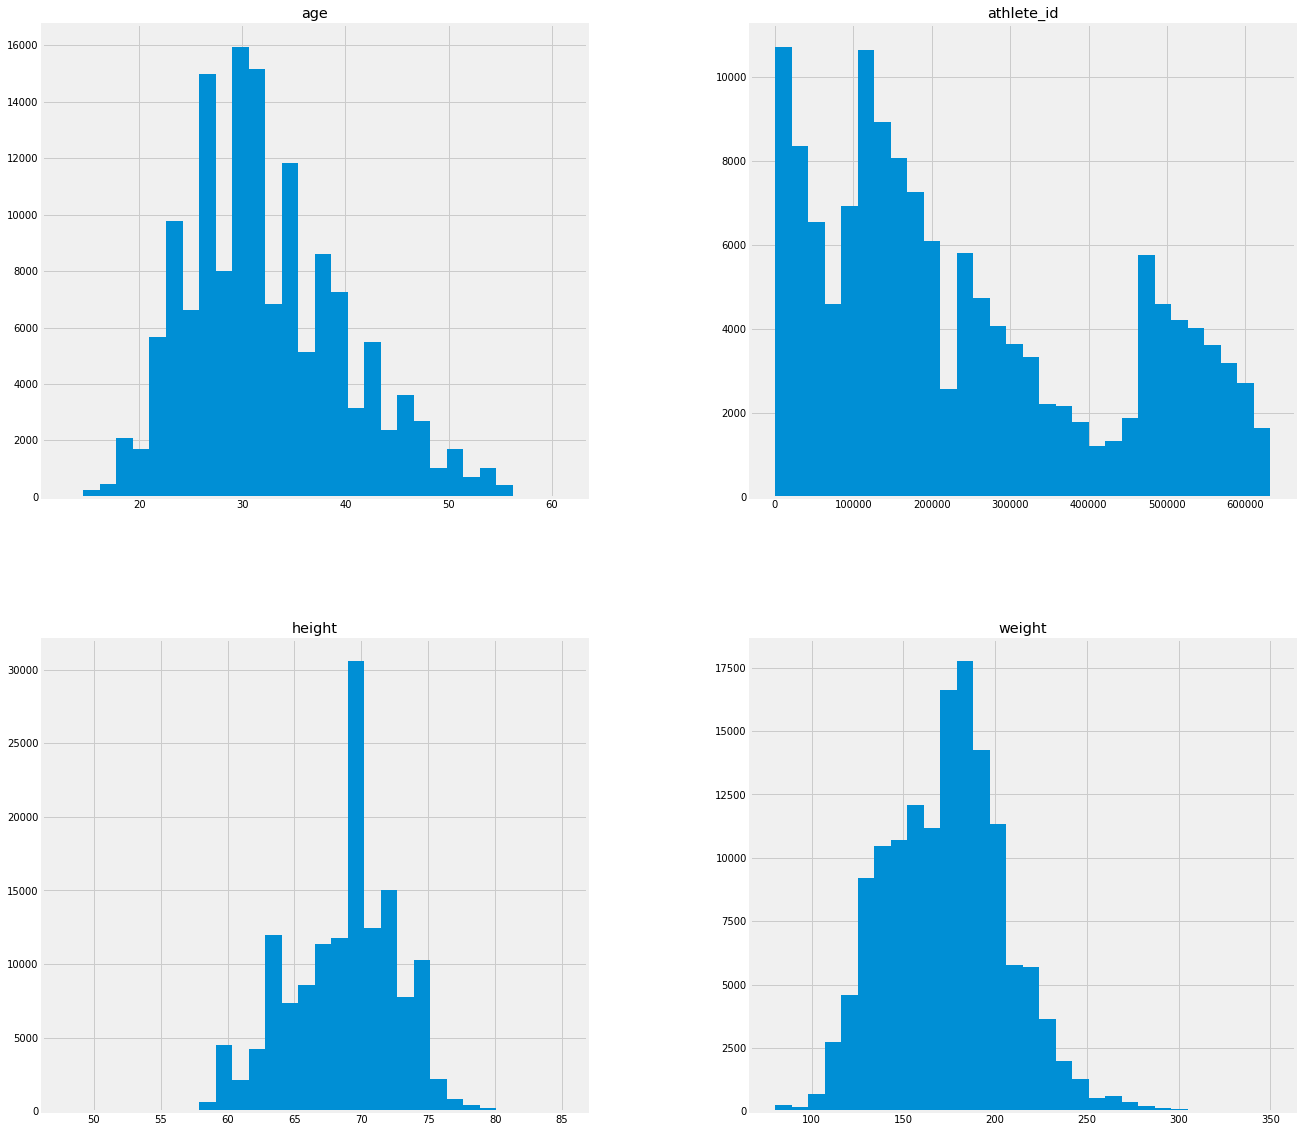

In [15]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
atts.hist(bins=30, ax=ax);

### Score Distribution by Event

#### Males - Events 1 through 4

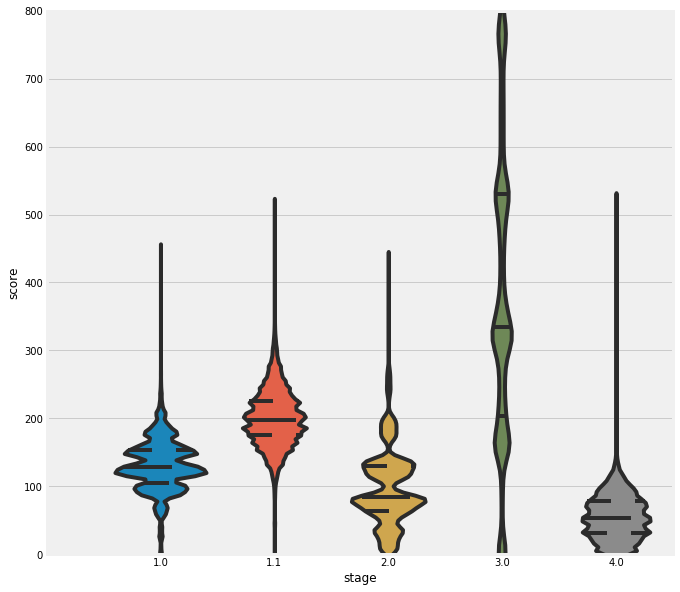

In [16]:
fig, gen_plot = plt.subplots(figsize=(10, 10))
gen_plot = sns.violinplot(x='stage', y='score', data=male_lead, inner='quartiles');
plt.xlim(-1,4.5);
plt.ylim(0,800);

#### Females - Events 1 through 4

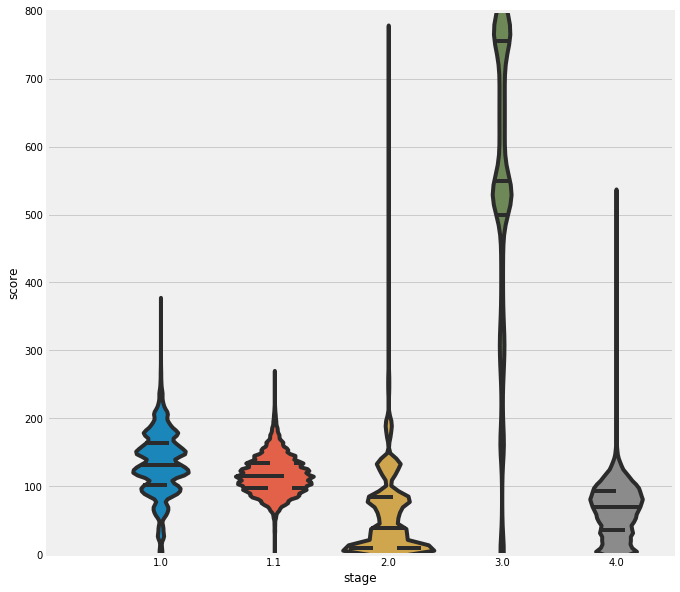

In [17]:
fig, gen_plot = plt.subplots(figsize=(10, 10))
gen_plot = sns.violinplot(x='stage', y='score', data=fem_lead, inner='quartiles');
plt.xlim(-1,4.5);
plt.ylim(0,800);

#### Zero-ing in on the nature of AMRAP events

#### Event 1.0 Rep List

9 Minute AMRAP (As Many Rounds/Reps as Possible)

- 15 Toes to Bar
- 10 Deadlifts (115#/75#)
- 5 Snatches (115#/75#)

Complete Round Rep Totals: 30, 60, 90, 120, 150, Etc.

This is a clear indication that many athletes will finish a round at the end of the time window, or will not try and work in reps with short duration left. Regardless of motivation, it is clear that getting additionl reps after each round could signifigantly increase your round rank in AMRAP workouts; especially at lower ranks.

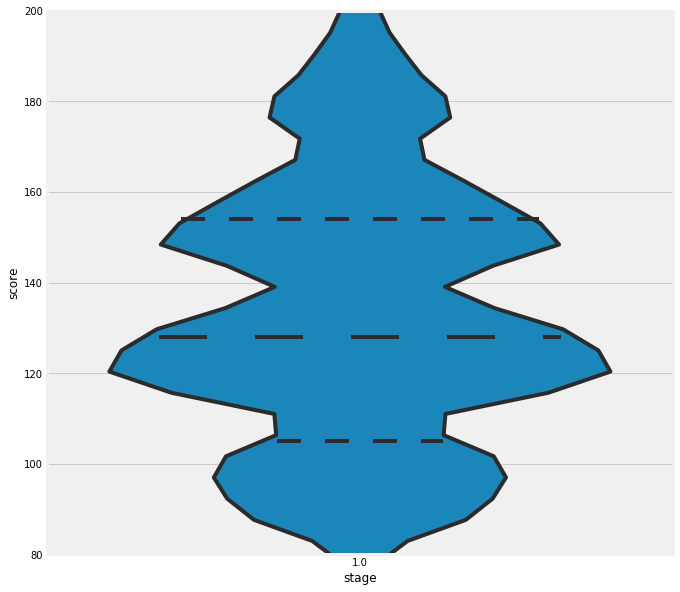

In [18]:
fig, gen_plot = plt.subplots(figsize=(10, 10))
gen_plot = sns.violinplot(x='stage', y='score', data=male_lead, inner='quartiles');
plt.xlim(-.5,.5);
plt.ylim(80,200);

### Benchmark WOD performance by Region

Regionality seems to play a part in both the participation and performance of athletes in the Games. There seems to be bias towards warmer climates, which will play a part at this level in the competition. The games are perfomed locally during the month of February/March. If athletes are submitting recent scores, this would be during the colder months of the year in the northern hemisphere.

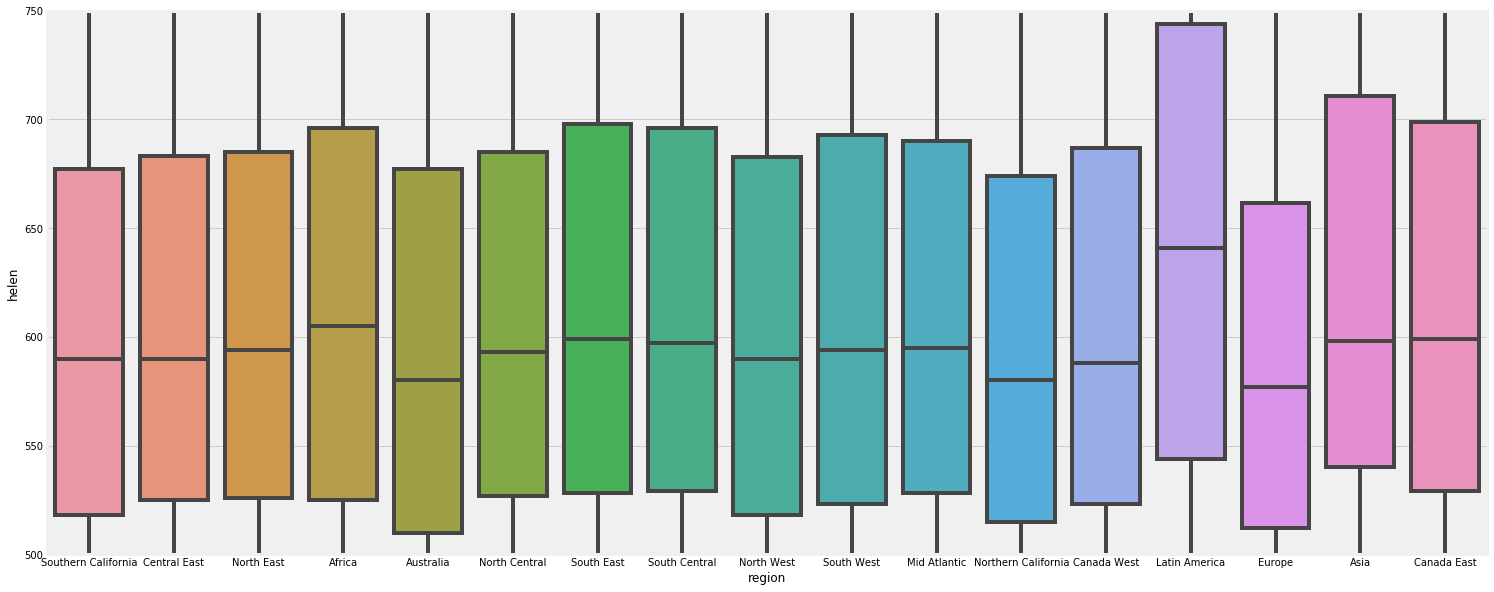

In [19]:
fig, gen_plot = plt.subplots(figsize=(23, 10))
gen_plot = sns.boxplot(x='region', y='helen', data=athletes[athletes.helen < 1000]);
plt.ylim(500,750);

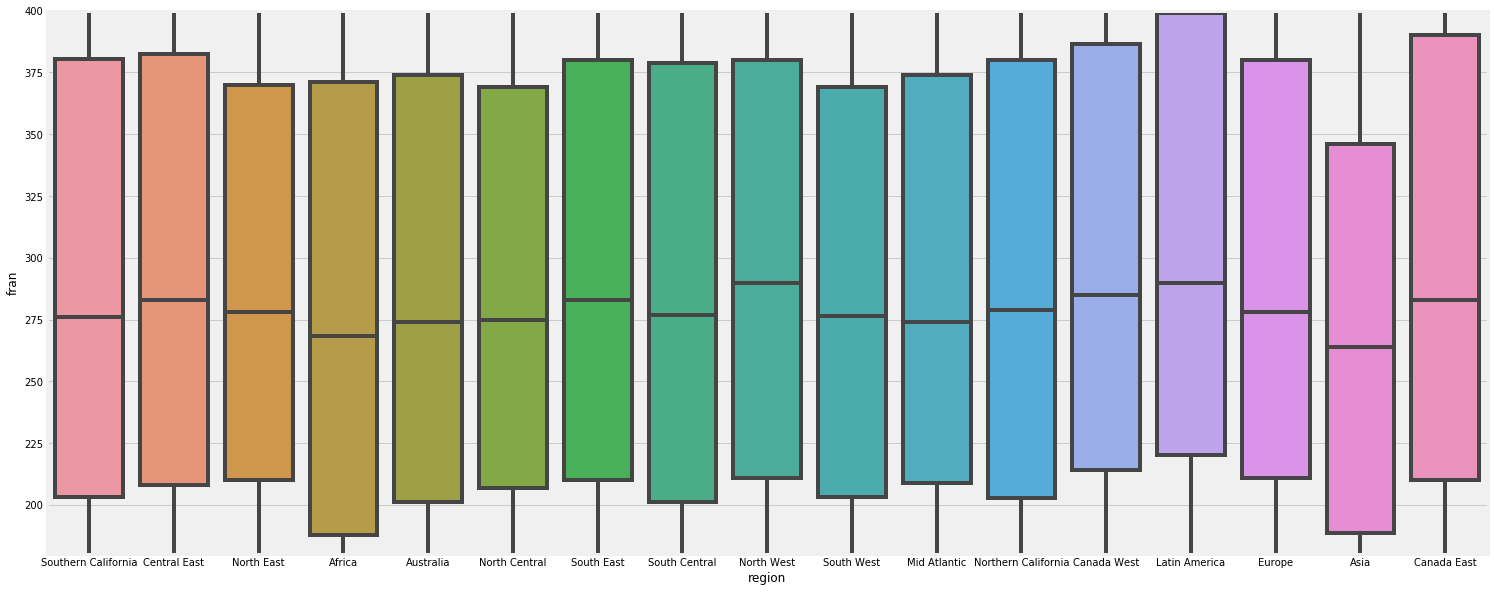

In [20]:
fig, gen_plot = plt.subplots(figsize=(23, 10))
gen_plot = sns.boxplot(x='region', y='fran', data=athletes[athletes.helen < 1000]);
plt.ylim(180,400);

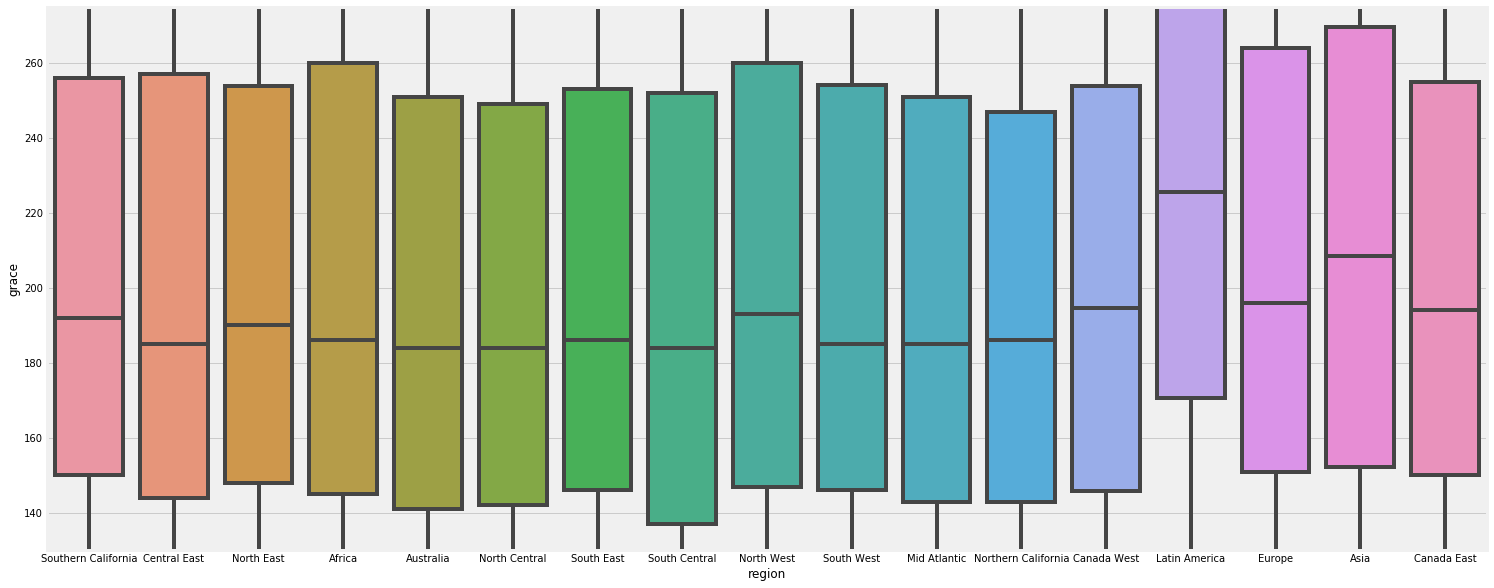

In [21]:
fig, gen_plot = plt.subplots(figsize=(23, 10))
gen_plot = sns.boxplot(x='region', y='grace', data=athletes[athletes.helen < 1000]);
plt.ylim(130,275);

### Benchmark Lifts

Male Data

C:\Users\Evan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


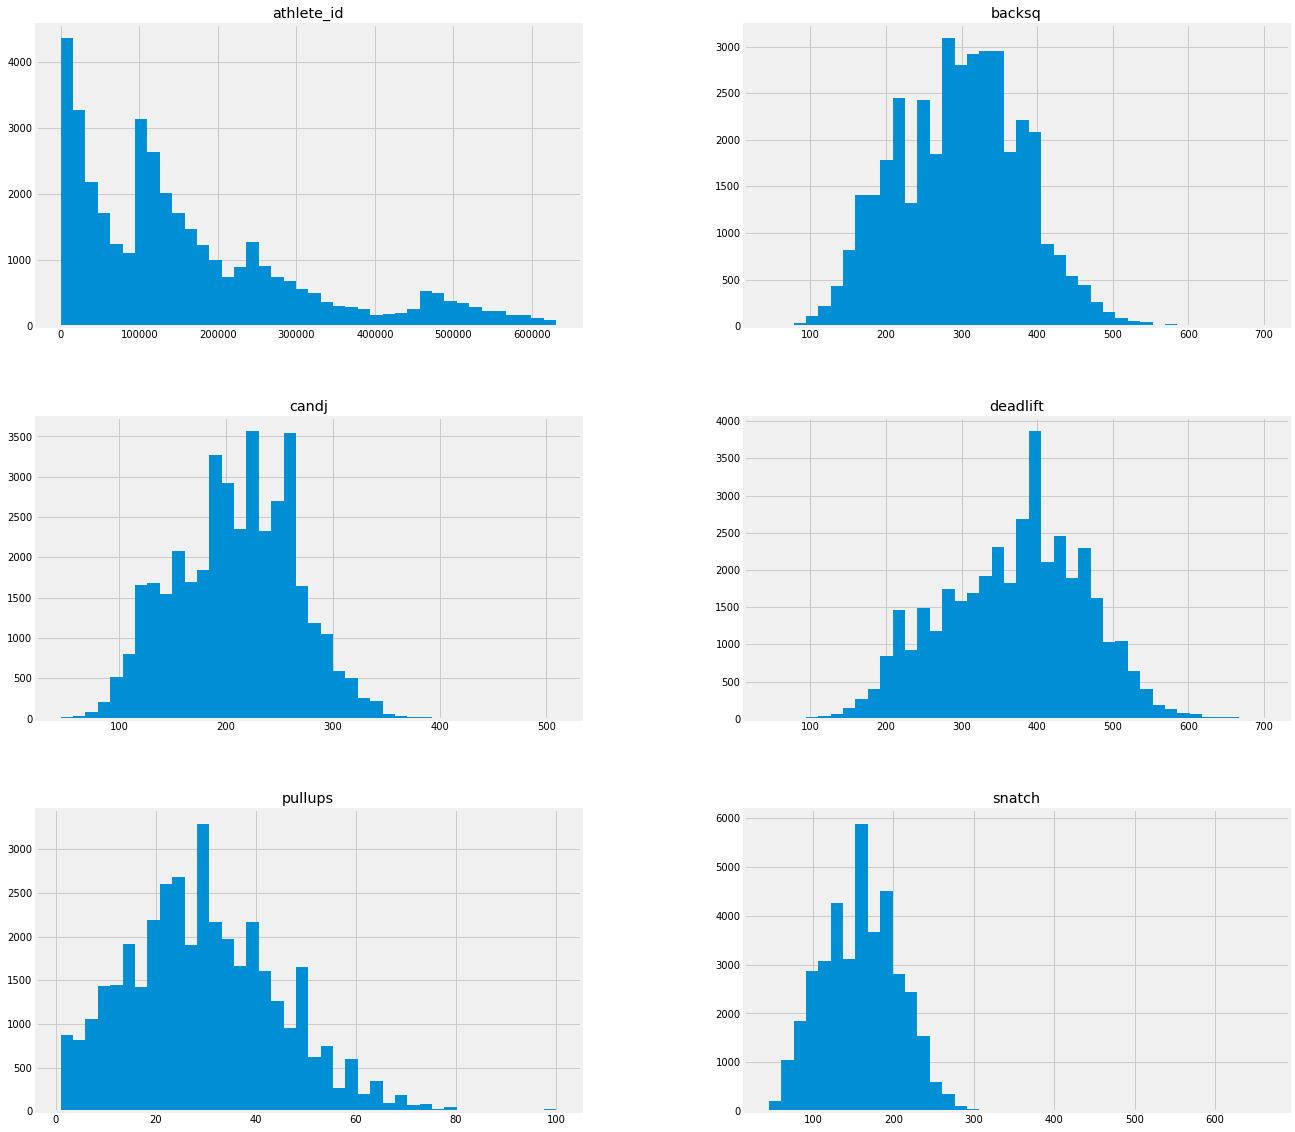

In [22]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
lifts.hist(bins=40, ax=ax);

### Correlation Between Lifts
Some of the lifts will utilize similar muscle combinations, and finding correlation between each will reduce dimensionality in our final feature selection.

In [23]:
import numpy as np

In [24]:
corr = lifts.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

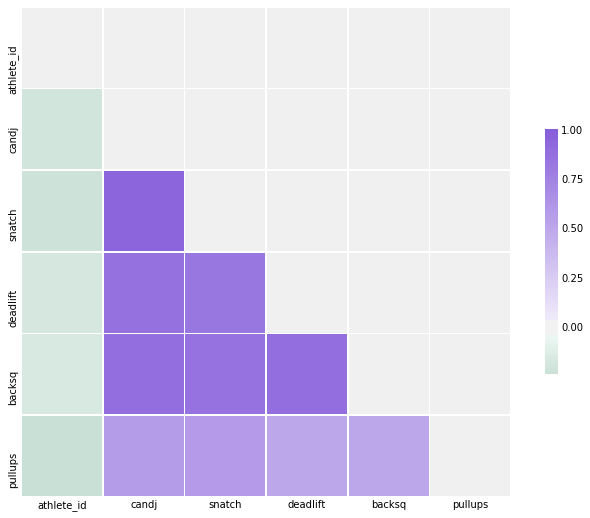

In [25]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(150,275, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5})

In [26]:
corr

,athlete_id,candj,snatch,deadlift,backsq,pullups
athlete_id,1.000000,-0.196166,-0.211972,-0.169086,-0.162771,-0.236251
candj,-0.196166,1.000000,0.943212,0.873888,0.896530,0.582834
snatch,-0.211972,0.943212,1.000000,0.832526,0.863913,0.585238
deadlift,-0.169086,0.873888,0.832526,1.000000,0.898133,0.505759
backsq,-0.162771,0.896530,0.863913,0.898133,1.000000,0.499288
pullups,-0.236251,0.582834,0.585238,0.505759,0.499288,1.000000


### Options for Personal Questions

In [27]:
personals = athletes[['athlete_id', 'eat', 'train', 'background', 'experience', 'schedule', 'howlong']].copy()

In [28]:
personals = personals.merge(places, on='athlete_id')
#personals['ave_rank'] = athletes_m[['1.0', '1.1', '2.0', '3.0', '4.0', '5.0']].mean(axis=1)

#### Eating

In [29]:
eat_opt = personals['eat'].unique()
eat_opt = map(str, eat_opt)
eat_opt = [i.split('|', 1)[0] for i in eat_opt]
eat_opt_list = set(eat_opt)

In [30]:
eat_opt_list = list(eat_opt_list)

In [31]:
eat_totals = [personals['eat'].str.count(i).sum() for i in eat_opt_list]
eat_dict = dict(zip(eat_opt_list, eat_totals))

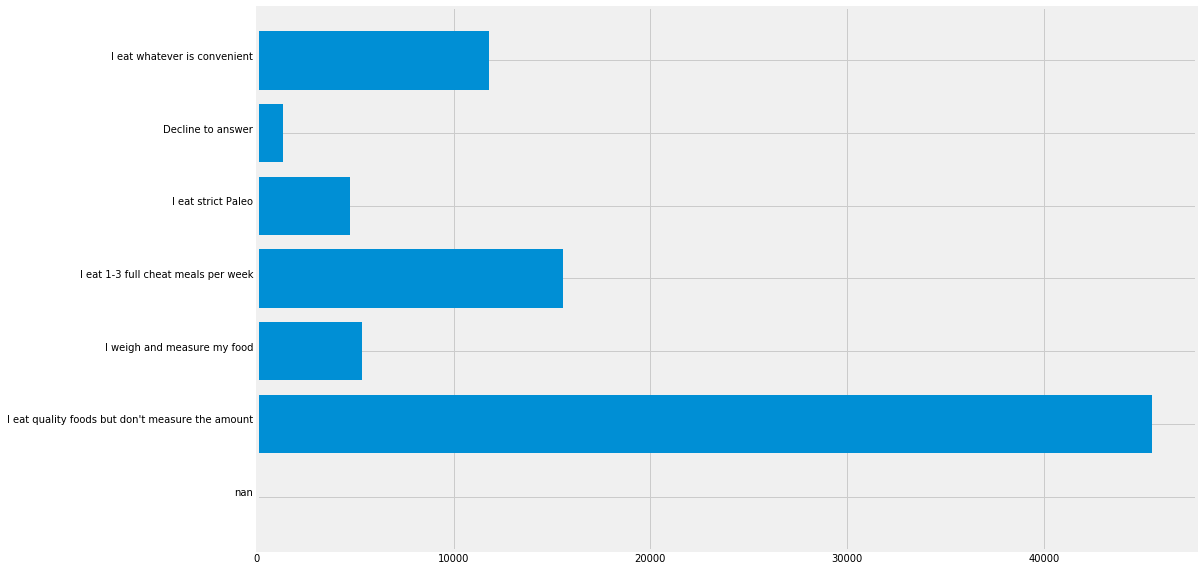

In [32]:
fig = plt.figure(figsize=(15,10))
plt.barh(range(len(eat_dict)), list(eat_dict.values()));
plt.yticks(range(len(eat_dict)), list(eat_dict.keys()), rotation=0, wrap=True);

#### Type of Training

In [33]:
train_opt = personals['train'].unique()
train_opt = map(str, train_opt)
train_opt = [i.split('|', 1)[0] for i in train_opt]
train_opt_list = set(train_opt)
train_opt_list = list(train_opt_list)

train_totals = [personals['train'].str.count(i).sum() for i in train_opt_list]
train_dict = dict(zip(train_opt_list, train_totals))

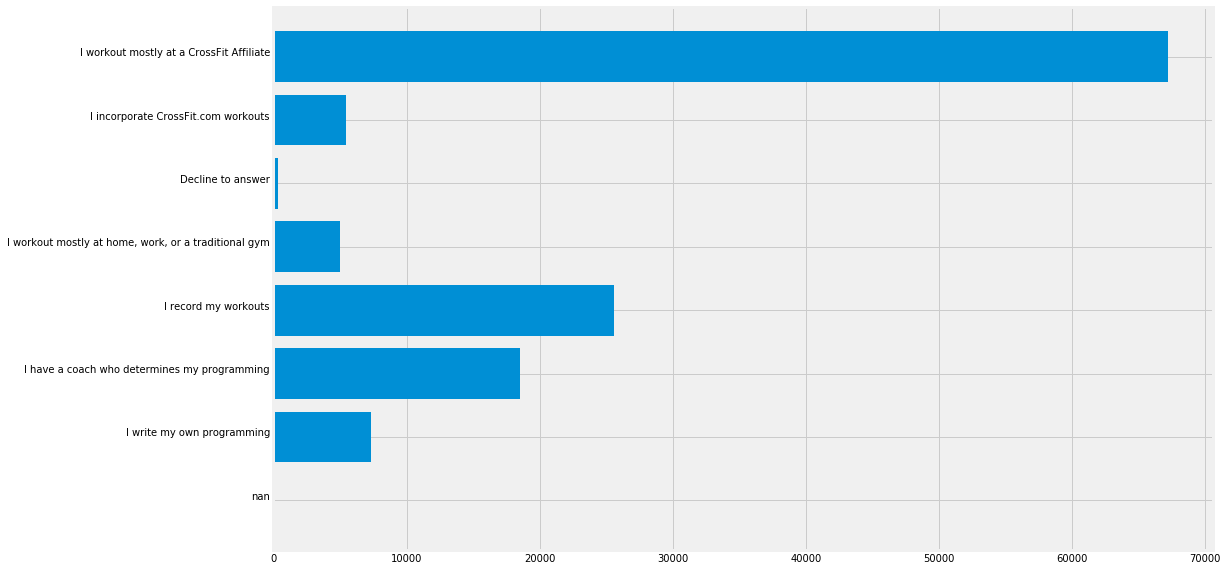

In [34]:
fig = plt.figure(figsize=(15,10))
plt.barh(range(len(train_dict)), list(train_dict.values()));
plt.yticks(range(len(train_dict)), list(train_dict.keys()), rotation=0, wrap=True);

#### Athletic Background

In [35]:
back_opt = personals['background'].unique()
back_opt = map(str, back_opt)
back_opt = [i.split('|', 1)[0] for i in back_opt]
back_opt_list = set(back_opt)
back_opt_list = list(back_opt_list)

back_totals = [personals['background'].str.count(i).sum() for i in back_opt_list]
back_dict = dict(zip(back_opt_list, back_totals))

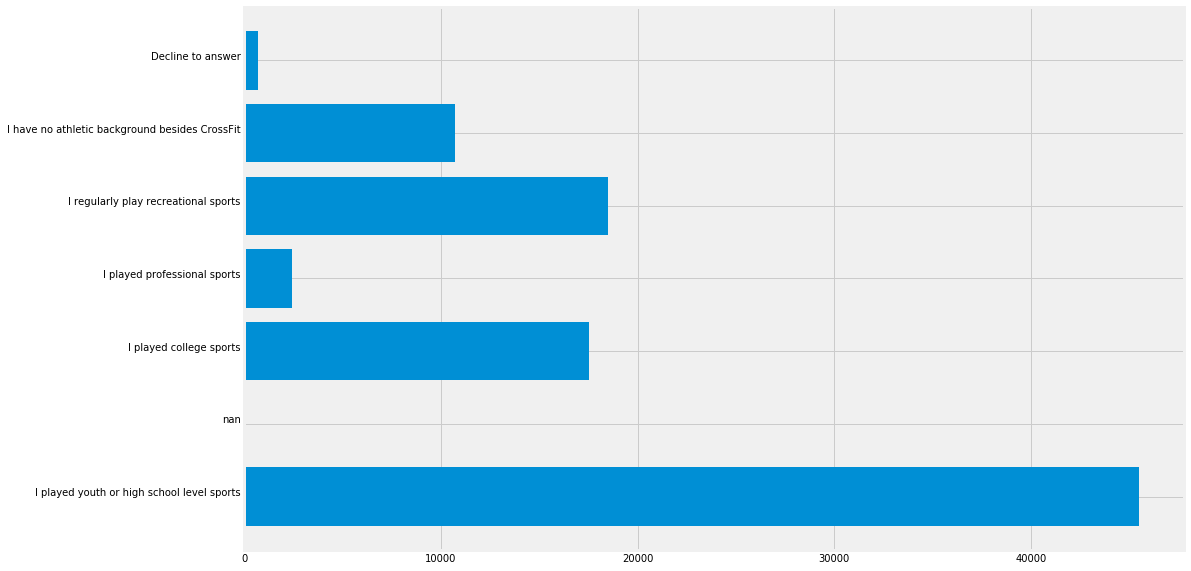

In [36]:
fig = plt.figure(figsize=(15,10))
plt.barh(range(len(back_dict)), list(back_dict.values()));
plt.yticks(range(len(back_dict)), list(back_dict.keys()), rotation=0, wrap=True);

#### Experience

In [37]:
exp_opt = personals['experience'].unique()
exp_opt = map(str, exp_opt)
exp_opt = [i.split('|', 1)[0] for i in exp_opt]
exp_opt_list = set(exp_opt)
exp_opt_list = list(exp_opt_list)

exp_totals = [personals['experience'].str.count(i).sum() for i in exp_opt_list]
exp_dict = dict(zip(exp_opt_list, exp_totals))

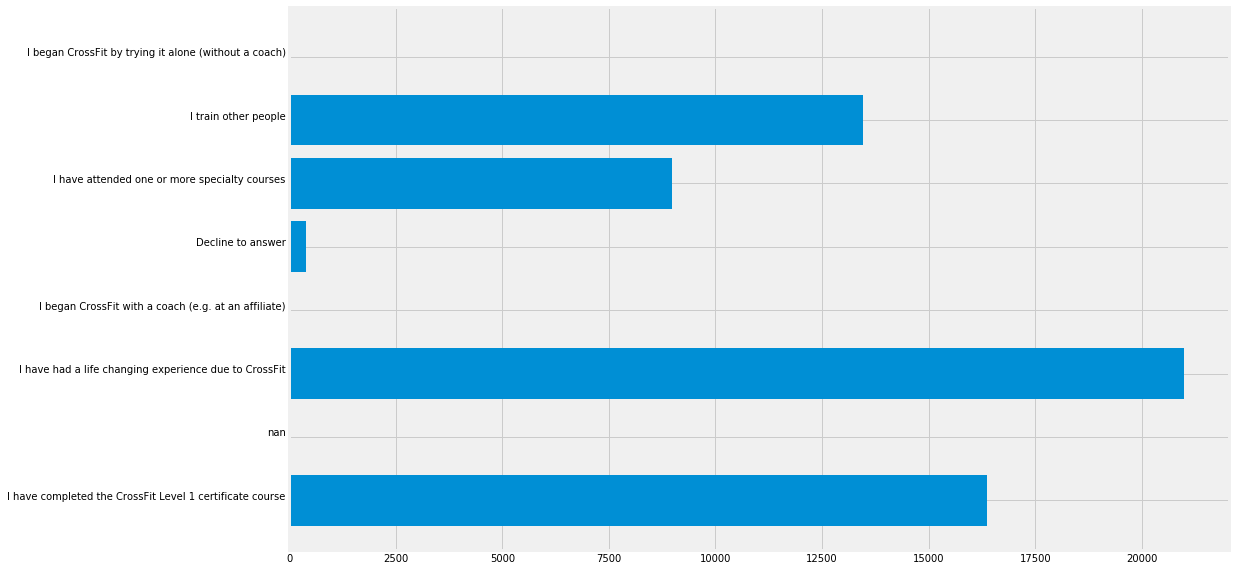

In [38]:
fig = plt.figure(figsize=(15,10))
plt.barh(range(len(exp_dict)), list(exp_dict.values()));
plt.yticks(range(len(exp_dict)), list(exp_dict.keys()), rotation=0, wrap=True);

#### Training Schedule

In [39]:
sch_opt = personals['schedule'].unique()
sch_opt = map(str, sch_opt)
sch_opt = [i.split('|', 1)[0] for i in sch_opt]
sch_opt_list = set(sch_opt)
sch_opt_list = list(sch_opt_list)

sch_totals = [personals['schedule'].str.count(i).sum() for i in sch_opt_list]
sch_dict = dict(zip(sch_opt_list, sch_totals))

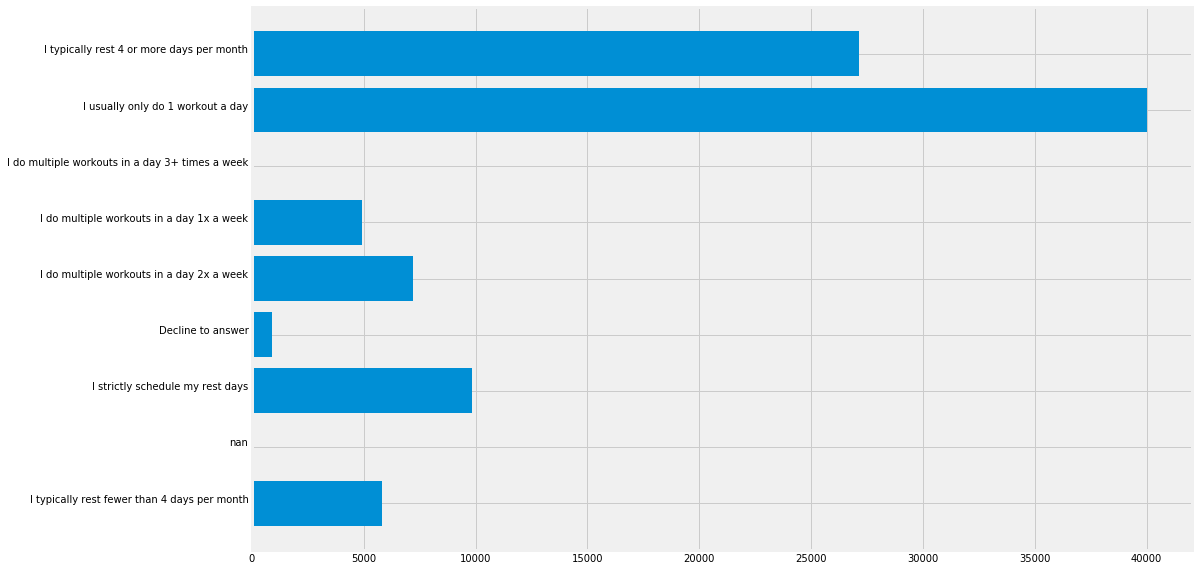

In [40]:
fig = plt.figure(figsize=(15,10))
plt.barh(range(len(sch_dict)), list(sch_dict.values()));
plt.yticks(range(len(sch_dict)), list(sch_dict.keys()), rotation=0, wrap=True);

#### Length of Time in Crossfit

In [41]:
len_opt = personals['howlong'].unique()
len_opt = map(str, len_opt)
len_opt = [i.split('|', 1)[0] for i in len_opt]
len_opt_list = set(len_opt)
len_opt_list = list(len_opt_list)

len_totals = [personals['howlong'].str.count(i).sum() for i in len_opt_list]
len_dict = dict(zip(len_opt_list, len_totals))

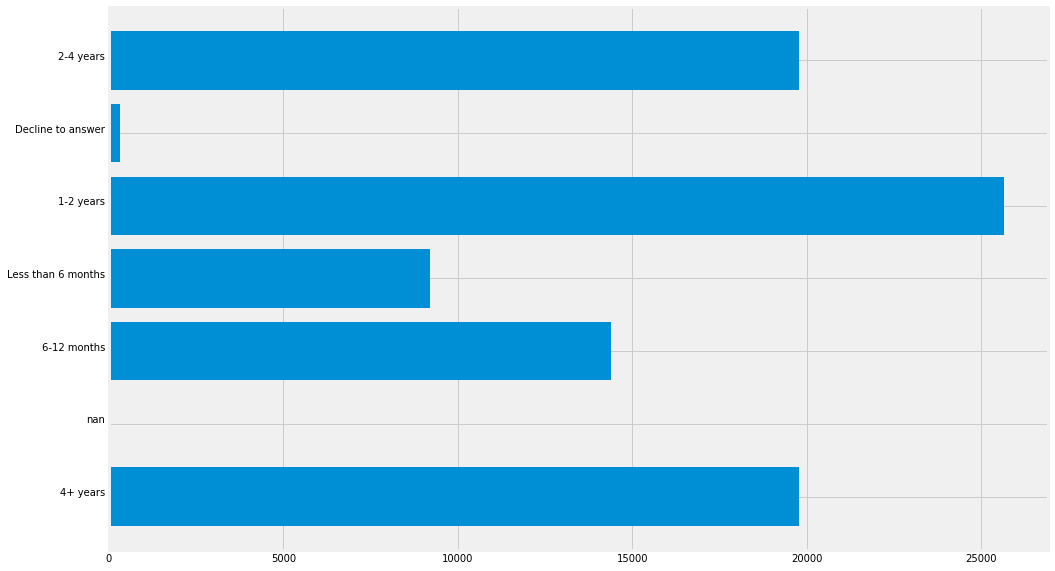

In [42]:
fig = plt.figure(figsize=(15,10))
plt.barh(range(len(len_dict)), list(len_dict.values()));
plt.yticks(range(len(len_dict)), list(len_dict.keys()), rotation=0, wrap=True);

### Running statistics

C:\Users\Evan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


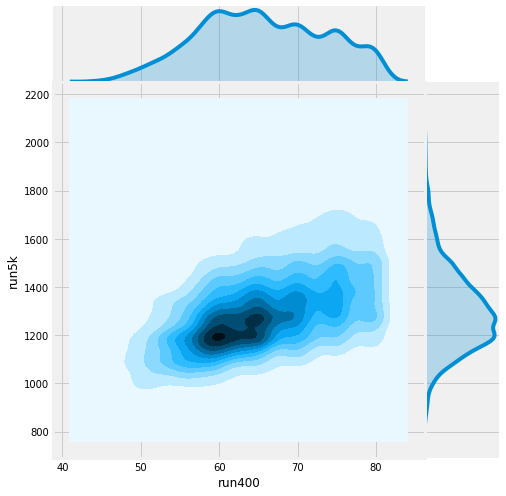

In [43]:
sns.jointplot(x=run.run400, y=run.run5k, kind='kde', height=7, space=0);

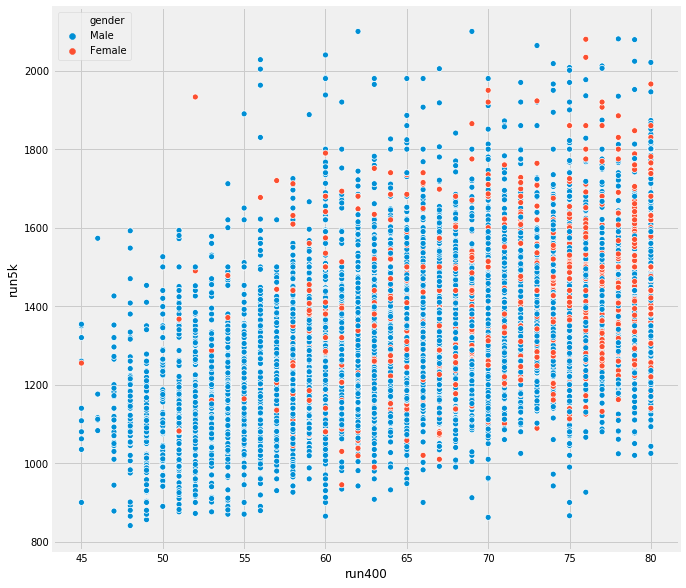

In [44]:
plt.subplots(figsize=(10, 10))
sns.scatterplot(x=run.run400, y=run.run5k, hue=run.gender);

In [45]:
corr_run = run.corr()
corr_run['run400'].sort_values(ascending=False)

run400        1.000000
run5k         0.446409
athlete_id    0.043980
Name: run400, dtype: float64

## Feature Selection

### Data Limitations

Based on the limited amount of user input in some of the fields, the scope of the features chosen will be narrowed to allow adequete training size and testing.

As for Benchmark workouts, I would like to focus on those fields most filled out by entrants:

- Fran (eliminates pullups as Fran is pullup heavy workout)
- Helen
- Grace

For specific movements, I will base this selection on a mixed representation of technical lifts, stamina, and raw power but avoiding collinearity of lifts:

- Snatch (more technical than C & J, both highly correlated)
- Deadlift (slightly higher variation over Backsquat)
- 400m Run & 5k (Shows mix of speed and endurance)

For background

In [46]:
features = athletes[['athlete_id', 'gender', 'snatch', 'deadlift', 'fran', 'helen', 'grace']].copy()
features = features.merge(places, on='athlete_id')
labels = features.ave_rank
features = features.drop(['1.0', '1.1', '2.0', '3.0', '4.0', '5.0'], 1)

In [47]:
features.head()

,athlete_id,gender,snatch,deadlift,fran,helen,grace,ave_rank
0,2554.0,Male,NaN,400.0,NaN,NaN,NaN,40152.666667
1,5164.0,Male,200.0,375.0,211.0,645.0,300.0,33455.166667
2,6610.0,Male,0.0,0.0,NaN,NaN,NaN,1732.500000
3,13285.0,Male,0.0,0.0,NaN,NaN,NaN,37559.333333
4,13576.0,Male,NaN,NaN,NaN,NaN,NaN,94737.166667


In [48]:
labels.head()

0    40152.666667
1    33455.166667
2     1732.500000
3    37559.333333
4    94737.166667
Name: ave_rank, dtype: float64

In [49]:
features = features[features['snatch'].between(45, 700)]
features = features[features['deadlift'].between(45, 700)]
features = features[features['fran'].between(45, 500)]
features = features[features['helen'].between(200, 2000)]
features = features[features['grace'].between(30, 500)]
features = features[features['gender'] == 'Male']
features = features.drop(['gender', 'athlete_id'], axis = 1)

In [50]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9272 entries, 1 to 235703
Data columns (total 6 columns):
snatch      9272 non-null float64
deadlift    9272 non-null float64
fran        9272 non-null float64
helen       9272 non-null float64
grace       9272 non-null float64
ave_rank    9272 non-null float64
dtypes: float64(6)
memory usage: 507.1 KB


## Train/Test Split (Male Tested)

In [51]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, features.ave_rank, 
                                                                            test_size=0.15, random_state=42)

In [52]:
features_train.describe()

,snatch,deadlift,fran,helen,grace,ave_rank
count,7881.000000,7881.000000,7881.000000,7881.000000,7881.000000,7881.000000
mean,188.390052,424.752443,256.968024,570.389291,189.929197,31933.822235
std,36.243405,61.347839,89.056149,103.421158,76.336320,22259.975004
min,55.000000,132.000000,81.000000,204.000000,56.000000,30.500000
25%,165.000000,385.000000,183.000000,497.000000,135.000000,14090.166667
50%,185.000000,425.000000,238.000000,552.000000,173.000000,28211.500000
75%,214.000000,465.000000,316.000000,622.000000,226.000000,46234.833333
max,375.000000,675.000000,500.000000,1440.000000,500.000000,136364.000000


In [53]:
features_train.head()

,snatch,deadlift,fran,helen,grace,ave_rank
27730,195.0,485.0,265.0,620.0,156.0,32815.750000
28261,185.0,500.0,159.0,501.0,111.0,36148.500000
10367,215.0,445.0,188.0,500.0,135.0,3220.166667
3172,165.0,397.0,155.0,432.0,116.0,18236.166667
84160,195.0,450.0,174.0,565.0,210.0,30645.333333


In [54]:
labels_train.head()

27730    32815.750000
28261    36148.500000
10367     3220.166667
3172     18236.166667
84160    30645.333333
Name: ave_rank, dtype: float64

Describe who we have in our dataset and how this analysis can be biased towards the top-end of athletes. Those who take it more as a sport than hobby are inherently more involved in recording workouts.

### Correlation Matrix of Selected Features
The correlations make sense. The better the athlete the lower the rank. Low rank should mean higher lift values and lower times in workouts. 

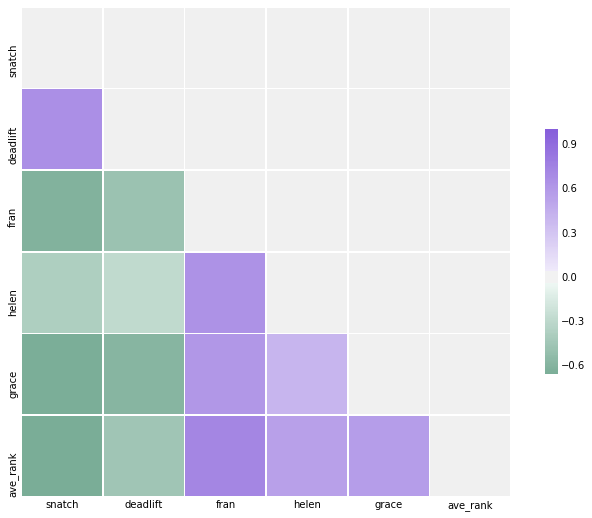

In [55]:
corr = features_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(150,275, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5});

In [56]:
corr['ave_rank'].sort_values(ascending=False)

ave_rank    1.000000
fran        0.727226
grace       0.577914
helen       0.548014
deadlift   -0.454232
snatch     -0.658921
Name: ave_rank, dtype: float64

#### Checking for Collinearity

In [57]:
corr

,snatch,deadlift,fran,helen,grace,ave_rank
snatch,1.000000,0.668880,-0.610592,-0.376656,-0.647868,-0.658921
deadlift,0.668880,1.000000,-0.474660,-0.278244,-0.581891,-0.454232
fran,-0.610592,-0.474660,1.000000,0.642780,0.605479,0.727226
helen,-0.376656,-0.278244,0.642780,1.000000,0.407321,0.548014
grace,-0.647868,-0.581891,0.605479,0.407321,1.000000,0.577914
ave_rank,-0.658921,-0.454232,0.727226,0.548014,0.577914,1.000000


## Feature scaling
Use the Min/Max Scaler

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
fstd_train = scaler.fit_transform(features_train)

In [60]:
features_train = pd.DataFrame(fstd_train, columns=features_train.columns, index=features_train.index)

In [61]:
features_train.head()

,snatch,deadlift,fran,helen,grace,ave_rank
27730,0.43750,0.650092,0.439141,0.336570,0.225225,0.240478
28261,0.40625,0.677716,0.186158,0.240291,0.123874,0.264924
10367,0.50000,0.576427,0.255370,0.239482,0.177928,0.023396
3172,0.34375,0.488029,0.176611,0.184466,0.135135,0.133538
84160,0.43750,0.585635,0.221957,0.292071,0.346847,0.224558


#### Eliminate ave_rank

In [62]:
features_train.drop('ave_rank', axis=1, inplace=True)

## Cross validation Set-up

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

## Testing - To be Continued in later update (as of 1/29/18)